In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import classification_report
import random
import numpy as np
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing import sequence
from sklearn import svm, datasets
# processing imports
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [32]:
df= pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_4.csv')
df.head()

C:\Users\12403\AppData\Local\Temp\ipykernel_16692\2262588307.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_4.csv')


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3000001,1.528099e+09,e,1,udp,3,192.168.100.147,6226,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
1,3000002,1.528099e+09,e,1,udp,3,192.168.100.147,6227,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
2,3000003,1.528099e+09,e,1,udp,3,192.168.100.147,6228,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
3,3000004,1.528099e+09,e,1,udp,3,192.168.100.147,6229,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
4,3000005,1.528099e+09,e,1,udp,3,192.168.100.147,6230,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668522 entries, 0 to 668521
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   pkSeqID                           668522 non-null  int64  
 1   stime                             668522 non-null  float64
 2   flgs                              668522 non-null  object 
 3   flgs_number                       668522 non-null  int64  
 4   proto                             668522 non-null  object 
 5   proto_number                      668522 non-null  int64  
 6   saddr                             668522 non-null  object 
 7   sport                             668522 non-null  object 
 8   daddr                             668522 non-null  object 
 9   dport                             668522 non-null  object 
 10  pkts                              668522 non-null  int64  
 11  bytes                             668522 non-null  i

In [34]:
clm=df.select_dtypes(['object']).columns.tolist()

In [35]:
clm

['flgs',
 'proto',
 'saddr',
 'sport',
 'daddr',
 'dport',
 'state',
 'category',
 'subcategory']

In [49]:
clm=['flgs',
 'proto',
 'saddr',
 'sport',
 'daddr',
 'state',]

In [50]:
clm

['flgs', 'proto', 'saddr', 'sport', 'daddr', 'state']

In [55]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for x in clm:
    df['sport']=le.fit_transform(df['sport'])
    

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [57]:
df['sport'].value_counts().tolist()

[8928,
 1031,
 1030,
 1030,
 1029,
 1029,
 1028,
 1020,
 1005,
 1004,
 1004,
 1004,
 1004,
 1004,
 1004,
 1002,
 1002,
 1002,
 1002,
 1002,
 1002,
 1002,
 1001,
 1001,
 1001,
 1001,
 1001,
 1001,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 999,
 999,
 999,
 998,
 994,
 992,
 988,
 987,
 987,
 985,
 983,
 979,
 978,
 970,
 963,
 942,
 537,
 535,
 532,
 529,
 281,
 281,
 280,
 280,
 278,
 277,
 276,
 276,
 248,
 160,
 154,
 151,
 150,
 129,
 109,
 84,
 80,
 71,
 70,
 65,
 55,
 52,
 49,
 43,
 41,
 38,
 37,
 37,
 35,
 35,
 27,
 26,
 25,
 25,
 23,
 23,
 23,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1

In [4]:
df.shape

(668522, 46)

In [5]:
df['category'].value_counts()

DDoS              576884
Reconnaissance     91082
Normal               477
Theft                 79
Name: category, dtype: int64

In [6]:
df['flgs'].value_counts()

e        654807
eU        11159
e s        2331
e d         113
e g          99
e &           5
e   t         4
e *           3
e  D          1
Name: flgs, dtype: int64

In [161]:
df['attack'].value_counts()

1    668045
0       477
Name: attack, dtype: int64

In [9]:
df.drop('flgs',axis = 1,inplace = True)

In [10]:
df['proto'].value_counts()

udp          592145
tcp           67202
icmp           9030
arp             137
ipv6-icmp         8
Name: proto, dtype: int64

In [7]:
df.isnull().sum().any()

False

In [8]:
df.isnull().sum()

pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

In [185]:
df['attack'].value_counts()

1    668045
0       477
Name: attack, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='attack', ylabel='count'>

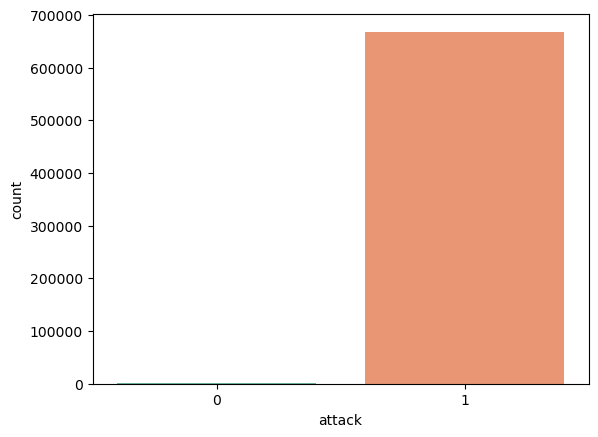

In [186]:
sns.countplot(df['attack'] , palette = 'Set2')

In [12]:
df2= pd.read_csv('UNSW_2018_IoT_Botnet_Dataset_9.csv')
df2.head()

,8000001,1528082590.759689,e g,tcp,192.168.100.149,7564,192.168.100.3,80,6,548,...,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP
0,8000002,1.528083e+09,e g,tcp,192.168.100.149,7565.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP
1,8000003,1.528083e+09,e g,tcp,192.168.100.149,7570.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP
2,8000004,1.528083e+09,e g,tcp,192.168.100.149,7571.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP
3,8000005,1.528083e+09,e g,tcp,192.168.100.149,7574.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP
4,8000006,1.528083e+09,e g,tcp,192.168.100.149,7575.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.212465,0.127479,0.042493,1,DoS,TCP


# Using 10 Best Features

In [43]:
df_train= pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
df_train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [46]:
df_train.shape

(2934817, 19)

In [45]:
df_train['dport'].value_counts()

80       2858794
1           5379
3306        3757
53           275
-1           166
          ...   
40344          1
3754           1
6459           1
26822          1
61804          1
Name: dport, Length: 6906, dtype: int64

In [41]:
clm=df_train.select_dtypes(['object']).columns.tolist()

In [42]:
clm

['proto', 'saddr', 'sport', 'daddr', 'dport', 'category', 'subcategory']

In [4]:
type(clm)

list

In [5]:
df_train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [6]:
df_test= pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')
df_test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [7]:
df_train['category'].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [8]:
df_train['attack'].value_counts()

1    2934447
0        370
Name: attack, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='attack', ylabel='count'>

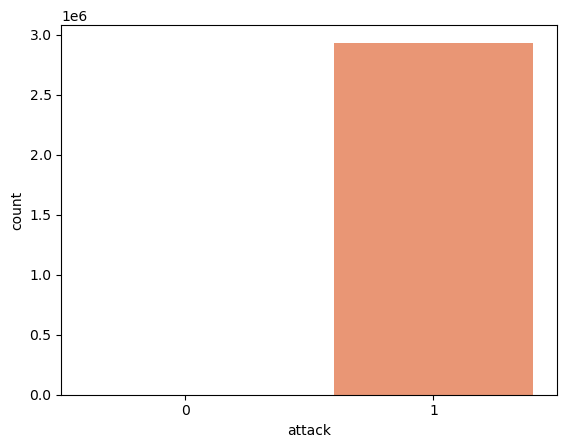

In [9]:
sns.countplot(df_train['attack'] , palette = 'Set2')

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for x in clm:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

In [11]:
df_train['category'].value_counts()

0    1541315
1    1320148
3      72919
2        370
4         65
Name: category, dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              int32  
 2   saddr              int32  
 3   sport              int32  
 4   daddr              int32  
 5   dport              int32  
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           int32  
 18  subcategory        int32  
dtypes: float64(6), int32(7), int64(6)
memory usage: 347.1 MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733705 entries, 0 to 733704
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            733705 non-null  int64  
 1   proto              733705 non-null  int32  
 2   saddr              733705 non-null  int32  
 3   sport              733705 non-null  int32  
 4   daddr              733705 non-null  int32  
 5   dport              733705 non-null  int32  
 6   seq                733705 non-null  int64  
 7   stddev             733705 non-null  float64
 8   N_IN_Conn_P_SrcIP  733705 non-null  int64  
 9   min                733705 non-null  float64
 10  state_number       733705 non-null  int64  
 11  mean               733705 non-null  float64
 12  N_IN_Conn_P_DstIP  733705 non-null  int64  
 13  drate              733705 non-null  float64
 14  srate              733705 non-null  float64
 15  max                733705 non-null  float64
 16  at

In [14]:
combined_df = pd.concat([df_train,df_test])

In [15]:
combined_df.shape

(3668522, 19)

In [16]:
combined_df.drop('subcategory',axis = 1,inplace = True)

In [17]:
# label col
y = combined_df.category

# independant variable
x = combined_df.drop(columns = ["category"] ) 

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=1)

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [20]:
pac=PassiveAggressiveClassifier(max_iter=50)

# training
pac.fit(x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [20]:
def report_heatmap(y_pred):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    #print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

Overall Accuracy: 95.92%
--------------------------


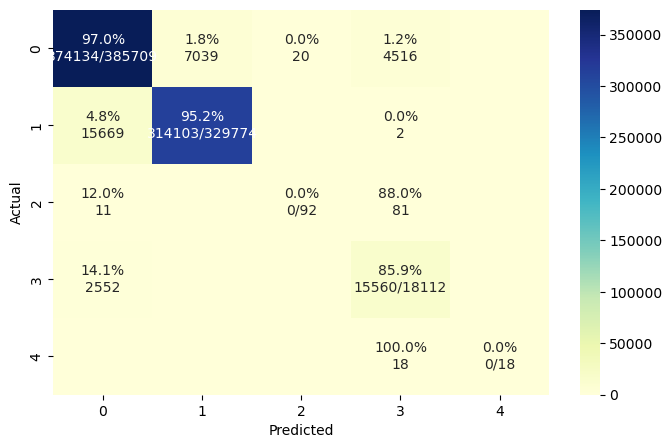

In [22]:
# Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)

# display report
report_heatmap(y_pred)

In [22]:
x_train.shape[1]

17

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max',
                   patience=10,
                   restore_best_weights=True)

NN_Classifier = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    callbacks =[es],
                    verbose=0,
                    validation_data=(x_test, y_test))

y_pred_NN=(model.predict(x_test) > 0.5).astype(int)
#report_heatmap(y_pred_NN)


22929/22929 [==============================] - 22s 963us/step


Overall Accuracy: 52.57%
--------------------------


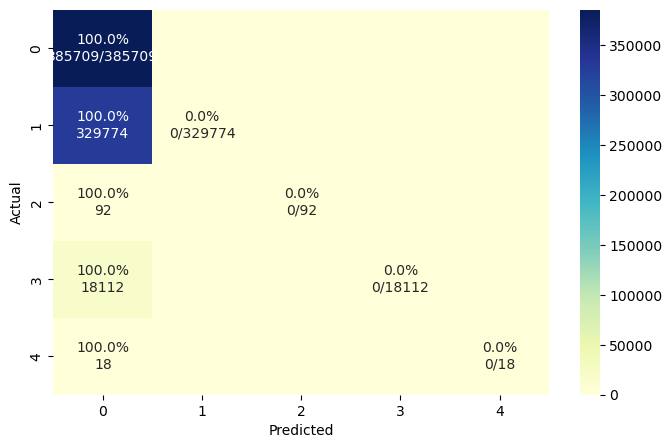

In [22]:
report_heatmap(y_pred_NN)

In [ ]:
1.Unlike the Perceptron, the learning algorithm of passive aggressive classifier includes a regularization parameter, C. This parameter controls the tradeoff between increasing the margin size and ensuring that the classifier does not misclassify training examples.

2.Passive aggressive classifiers update their model only when there is a mistake, rather than after every instance like the Perceptron.